# Simple Linear Regression

In [1]:
#Importing the neccassry packages 
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Reading the Dataset, the dataset is based on different fish species. The different features like length, height, and width are given to estimate the weight of the fish.
There are $159$ samples in total and $80$ percent of the data is used for training. The $20$ percent of the samples are used for testing the model.


In [2]:
current_path = os.getcwd()#% Finding current directory of the notebook
current_path =os.path.join(current_path,'Fish.csv') # Adding file name at the end of the address
fish_data = pd.read_csv(current_path)# reading csv file given on current_path
fish = fish_data.copy()
print(fish.sample(10))#Displaying 10 random samples from dataset
train, test= train_test_split(fish, test_size=0.2)# Splits data into random test and train samples

       Species  Weight  Length1  Length2  Length3   Height   Width
35       Roach    40.0     12.9     14.1     16.2   4.1472  2.2680
57   Whitefish   306.0     25.6     28.0     30.8   8.7780  4.6816
99       Perch   180.0     23.0     25.0     26.5   6.4395  3.6835
134       Pike   456.0     40.0     42.5     45.5   7.2800  4.3225
56   Whitefish   270.0     24.1     26.5     29.3   8.1454  4.2485
59   Whitefish   800.0     33.7     36.4     39.6  11.7612  6.5736
93       Perch   145.0     20.7     22.7     24.2   5.9532  3.6300
46       Roach   140.0     21.0     22.5     25.0   6.5500  3.3250
149      Smelt     9.8     10.7     11.2     12.4   2.0832  1.2772
11       Bream   500.0     28.7     31.0     36.2  14.3714  4.8146


# A generic function that accepts a column of data ‘input_feature’ and another column ‘output’ and returns the Simple Linear Regression parameters ‘intercept’ and ‘slope’. It uses the closed form solution to calculate the slope and intercept.
The Function will return intercept and slope to compute y, where the relation of y slope and intercept is:
$y= m.x+c$ , where m is slope and c is intercept 
For Close form Solution we know that:

\begin{equation*}
Slope = \frac{\sum X.Y - \frac{\sum X * \sum Y}{N}}{\sum X^{2}  -\frac{\sum X *\sum X}{N}}
\end{equation*}                       
\begin{equation*}
Intercept = \frac{\sum Y}{N} - Slope* \frac{\sum X}{N}
\end{equation*}


In [3]:
def linear_regression(input_feature, output):
    # compute the sum of input_feature and output
    Yi = output# Input column of Output
    Xi = input_feature# Input column of feature
    Yi_mean = Yi.mean() # calculating mean of output column
    Xi_mean = Xi.mean() # calculating mean of feature vector 
    N_samples = len(Xi) #Number of Samples
    
    
    # compute the product of the output and the input_feature and its sum
    Sum_YX = (Yi * Xi).sum()                      # calculating sum of product of feature vector and output
    P_sum_X_Y = (Yi.sum() * Xi.sum()) / N_samples # calculating product of sum of feature vector and output
    
    # compute the squared value of the input_feature and its sum
    S_X_squar = (Xi * Xi).sum()               #calculating sum of square of feature vector
    P_sum_X = (Xi.sum() * Xi.sum()) / N_samples  #calculating product of sum of feature vector
    
    # use the formula for the slope
    slope = (Sum_YX - P_sum_X_Y) / (S_X_squar - P_sum_X)
    
    # use the formula for the intercept
    intercept = Yi_mean - slope * Xi_mean
    
    return (intercept, slope)

# Prediction function that accepts a column of data ‘input_feature’, the ‘slope’, and the ‘intercept’ you learned, and returns a column of predictions ‘predicted_output’ for each entry in the input column.

The linear regression model results in a  best line through the data.
To get the prediction we use slope intercept form of a line given by:
\begin{equation*}
y= m.x+c
\end{equation*}



In [4]:
def predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_output = input_feature * slope + intercept #using y=mx+c
    return predicted_output

# Function for Residual Sum of Squares (RSS).
 
The residual sum of square is given by:

$$RSS = \sum (y - \hat{y})^2 $$


In [1]:
def rss(input_feature, output, intercept, slope):#Where rss is Residual sum of squares
    # First get the predictions
    prediction = input_feature * slope + intercept
    
    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residual = output - prediction

    # square the residuals and add them up
    RSS = (residual * residual).sum()
    
    return(RSS)

# Using function to estimate the slope and intercept on the training data to predict weight of fish for each one of the following (one at a time) inputs. Save each model (slope and intercept) separately. ‘Weight of the fish’ will be the ‘output’ and each of the following as an ‘input_feature’.

* Length1 (Vertical Length in cm)
* Length2 (Diagonal Length in cm)
* Length3 (Cross Length in cm)
*  Height (cm)
* Width (Diagonal width in cm)

Solving this problem we will have 5 intercepts and 5 slopes for each feature vector.

In [6]:
#Slope and Intercept based on Length1
intercept_l1, slope_l1 =linear_regression(train['Length1'],train['Weight'])

#Slope and Intercept based on Length2
intercept_l2, slope_l2 =linear_regression(train['Length2'],train['Weight'])

#Slope and Intercept based on Length3
intercept_l3, slope_l3 =linear_regression(train['Length3'],train['Weight'])

#Slope and Intercept based on Height
intercept_h, slope_h =linear_regression(train['Height'],train['Weight'])

#Slope and Intercept based on Width
intercept_w, slope_w =linear_regression(train['Width'],train['Weight'])

# Using above estimated slopes and intercepts for each of model, fit a line through training data points. Draw separate plot for each of the ‘input_feature’.


In [7]:
# prediction for given feature vector X with slope and intercept

weight_pred_l1 = predictions(train['Length1'], intercept_l1, slope_l1)# Weight of the fish for L1
weight_pred_l2 = predictions(train['Length2'], intercept_l2, slope_l2)# Weight of the fish for L2
weight_pred_l3 = predictions(train['Length3'], intercept_l3, slope_l3)# Weight of the fish for L3
weight_pred_h = predictions(train['Height'], intercept_h, slope_h)    # Weight of the fish  for H
weight_pred_w = predictions(train['Width'], intercept_w, slope_w)     # Weight of the fish for W


# Plot for Length1 (Vertical length) and predicticted line through

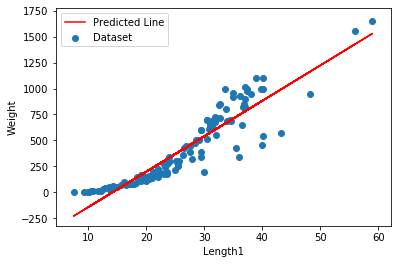

In [9]:
plt.plot(train['Length1'],weight_pred_l1,color='red')
plt.scatter(train['Length1'],train['Weight'])
plt.legend(["Predicted Line", "Dataset"])
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.savefig('Length1 based model.png',dpi=100)

# Plot for Length2 (Diagonal length) and predicticted line through data

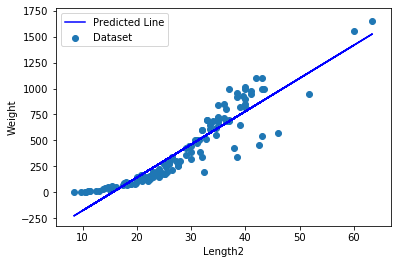

In [10]:
from matplotlib import pyplot as plt
plt.plot(train['Length2'],weight_pred_l2,color='blue')
plt.scatter(train['Length2'],train['Weight'])
plt.legend(["Predicted Line", "Dataset"])
plt.xlabel('Length2')
plt.ylabel('Weight')
plt.savefig('Length2 based model.png',dpi=100)

# Plot for Length3 (Cross Length) and predicticted line through data

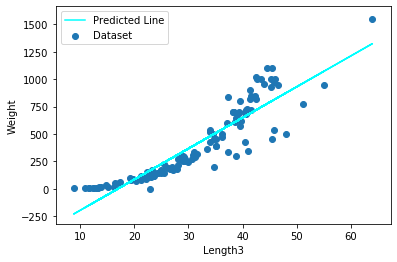

In [50]:
from matplotlib import pyplot as plt
plt.plot(train['Length3'],weight_pred_l3,color='cyan')
plt.scatter(train['Length3'],train['Weight'])
plt.legend(["Predicted Line", "Dataset"])
plt.xlabel('Length3')
plt.ylabel('Weight')
plt.savefig('Length3 based model.png',dpi=100)

# Plot for Height and predicticted line through data

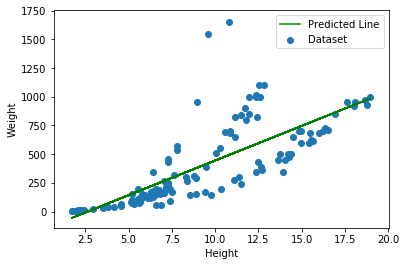

In [11]:
from matplotlib import pyplot as plt
plt.plot(train['Height'],weight_pred_h,color='green')
plt.scatter(train['Height'],train['Weight'])
plt.legend(["Predicted Line", "Dataset"])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.savefig('Height based model.png',dpi=100)

# Plot for Width and predicticted line through data

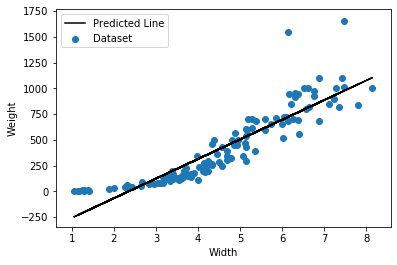

In [12]:
from matplotlib import pyplot as plt
plt.plot(train['Width'],weight_pred_w,color='black')
plt.scatter(train['Width'],train['Weight'])
plt.legend(["Predicted Line", "Dataset"])
plt.xlabel('Width')
plt.ylabel('Weight')
plt.savefig('Width based model.png',dpi=100)

# Plot for all the lines

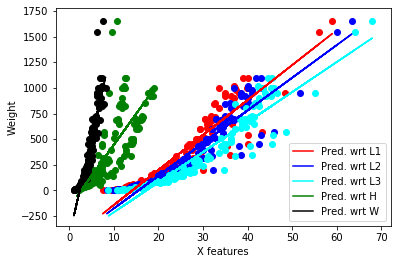

In [13]:

plt.plot(train['Length1'],weight_pred_l1,color='red')
plt.plot(train['Length2'],weight_pred_l2,color='blue')
plt.plot(train['Length3'],weight_pred_l3,color='cyan')
plt.plot(train['Height'],weight_pred_h,color='green')
plt.plot(train['Width'],weight_pred_w,color='black')

plt.scatter(train['Length1'],train['Weight'],color='red')
plt.scatter(train['Length2'],train['Weight'],color='blue')
plt.scatter(train['Length3'],train['Weight'],color='cyan')
plt.scatter(train['Height'],train['Weight'],color='green')
plt.scatter(train['Width'],train['Weight'],color='black')

plt.legend(["Pred. wrt L1", "Pred. wrt L2","Pred. wrt L3","Pred. wrt H","Pred. wrt W",])
plt.xlabel('X features')
plt.ylabel('Weight')
plt.savefig('all model.png',dpi=100)

# Plot the RSS vs input_features for training and test data. Which model has lowest RSS on TEST data? Think about why this might be the case.

In [18]:
import numpy as np
rss_train=np.zeros((5,1)) 
rss_test=np.zeros((5,1))

rss_train[0] = rss(train['Length1'], train['Weight'], intercept_l1, slope_l1)#Rss for Train data feature column1
rss_train[1] = rss(train['Length2'], train['Weight'], intercept_l2, slope_l2)#Rss for Train data feature column2
rss_train[2] = rss(train['Length3'], train['Weight'], intercept_l3, slope_l3)#Rss for Train data feature column3
rss_train[3] = rss(train['Height'], train['Weight'], intercept_h, slope_h)   #Rss for Train data feature column4
rss_train[4] = rss(train['Width'], train['Weight'], intercept_w, slope_w)    #Rss for Train data feature column5
rss_test[0] = rss(test['Length1'], test['Weight'], intercept_l1, slope_l1)   #Rss for Test data feature column1
rss_test[1] = rss(test['Length2'], test['Weight'], intercept_l2, slope_l2)   #Rss for Test data feature column2
rss_test[2] = rss(test['Length3'], test['Weight'], intercept_l3, slope_l3)   #Rss for Test data feature column3
rss_test[3] = rss(test['Height'], test['Weight'], intercept_h, slope_h)      #Rss for Test data feature column4
rss_test[4] = rss(test['Width'], test['Weight'], intercept_w, slope_w)       #Rss for Test data feature column5

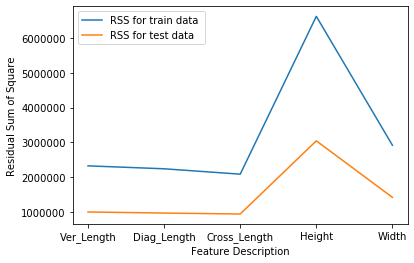

In [19]:
feature_vector=['Ver_Length','Diag_Length','Cross_Length','Height','Width'] 
plt.plot(feature_vector,rss_train)
plt.plot(feature_vector,rss_test)
plt.legend(["RSS for train data ", "RSS for test data "])
plt.xlabel('Feature Description')
plt.ylabel('Residual Sum of Square')
plt.savefig('Residual Plot.png',dpi=100)

In [20]:
print('Minimum RSS of test data is on ',rss_test[np.argmin(rss_test)])
print('Minimum RSS of train data is on ',rss_train[np.argmin(rss_train)])

Minimum RSS of test data is on  [942428.60810337]
Minimum RSS of train data is on  [2087163.17808048]
